In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
def compute_cost_ridge(X, y, w, b, lambda_):
    m = len(y)
    cost = 0
    for i in range(m):
        prediction = np.dot(w, X[i]) + b
        cost += (prediction - y[i]) ** 2
    cost = cost / (2 * m)
    reg = (lambda_ / (2 * m)) * np.sum(w ** 2)
    return cost + reg



In [6]:
def compute_cost_lasso(X, y, w, b, lambda_):
    m = len(y)
    cost = 0
    for i in range(m):
        prediction = np.dot(w, X[i]) + b
        cost += (prediction - y[i]) ** 2
    cost = cost / (2 * m)
    reg = (lambda_ / (2 * m)) * np.sum(np.abs(w))
    return cost + reg

In [7]:
def compute_gradient_ridge(X, y, w, b, lambda_):
    m = len(y)
    n = len(w)

    dj_dw = np.zeros(n)
    dj_db = 0

    for i in range(m):
        prediction = np.dot(w, X[i]) + b
        error = prediction - y[i]

        for j in range(n):
            dj_dw[j] += error * X[i][j]

        dj_db += error

    dj_dw = dj_dw / m + (lambda_ / m) * w
    dj_db = dj_db / m

    return dj_dw, dj_db

In [8]:

def compute_gradient_lasso(X, y, w, b, lambda_):
    m = len(y)
    n = len(w)

    dj_dw = np.zeros(n)
    dj_db = 0

    for i in range(m):
        prediction = np.dot(w, X[i]) + b
        error = prediction - y[i]

        for j in range(n):
            dj_dw[j] += error * X[i][j]

        dj_db += error

    dj_dw = dj_dw / m + (lambda_ / m) * np.sign(w)
    dj_db = dj_db / m

    return dj_dw, dj_db

In [9]:
def gradient_descent(X, y, w, b, alpha, steps, lambda_, mode="ridge"):
    cost_history = []

    for step in range(steps):

        if mode == "ridge":
            dj_dw, dj_db = compute_gradient_ridge(X, y, w, b, lambda_)
            cost = compute_cost_ridge(X, y, w, b, lambda_)
        else:
            dj_dw, dj_db = compute_gradient_lasso(X, y, w, b, lambda_)
            cost = compute_cost_lasso(X, y, w, b, lambda_)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost_history.append(cost)

        if step % 100 == 0:
            print(f"{mode.upper()} Iteration {step}: Cost = {cost}")

    return w, b, cost_history

In [11]:
df = pd.read_csv(r"C:\Users\Pratheek\Documents\RNC Codes\Task 8\Boston.csv")

if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

X = df.drop(columns=['medv']).values
y = df['medv'].values


In [13]:
X_train = X[:400]
y_train = y[:400]

X_test = X[400:]
y_test = y[400:]

In [14]:
mu = X_train.mean(axis=0)
sigma = X_train.std(axis=0)
sigma[sigma == 0] = 1

X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

In [15]:
w_ridge = np.zeros(X_train.shape[1])
w_lasso = np.zeros(X_train.shape[1])
b_ridge = 0
b_lasso = 0

alpha = 0.01
steps = 2000
lambda_ = 10

In [20]:
w_ridge, b_ridge, ridge_cost = gradient_descent(
    X_train, y_train, w_ridge, b_ridge, alpha, steps, lambda_, mode="ridge"
)

RIDGE Iteration 0: Cost = 337.98744999999985
RIDGE Iteration 100: Cost = 53.72701277511542
RIDGE Iteration 200: Cost = 17.858129659478777
RIDGE Iteration 300: Cost = 12.956355570002424
RIDGE Iteration 400: Cost = 12.202356604634051
RIDGE Iteration 500: Cost = 12.032678734528533
RIDGE Iteration 600: Cost = 11.961117018518074
RIDGE Iteration 700: Cost = 11.916242098802853
RIDGE Iteration 800: Cost = 11.884450061698988
RIDGE Iteration 900: Cost = 11.861205040019195
RIDGE Iteration 1000: Cost = 11.84401621403552
RIDGE Iteration 1100: Cost = 11.831219414383813
RIDGE Iteration 1200: Cost = 11.821640626348241
RIDGE Iteration 1300: Cost = 11.814436539474478
RIDGE Iteration 1400: Cost = 11.808995475855276
RIDGE Iteration 1500: Cost = 11.804870424084553
RIDGE Iteration 1600: Cost = 11.801732538202126
RIDGE Iteration 1700: Cost = 11.799338431964248
RIDGE Iteration 1800: Cost = 11.797506965213033
RIDGE Iteration 1900: Cost = 11.796102636140418


In [16]:
w_lasso, b_lasso, lasso_cost = gradient_descent(
    X_train, y_train, w_lasso, b_lasso, alpha, steps, lambda_, mode="lasso"
)

LASSO Iteration 0: Cost = 337.98744999999985
LASSO Iteration 100: Cost = 53.59989720796801
LASSO Iteration 200: Cost = 17.6491507607526
LASSO Iteration 300: Cost = 12.724044288347573
LASSO Iteration 400: Cost = 11.955866621477217
LASSO Iteration 500: Cost = 11.772797493894979
LASSO Iteration 600: Cost = 11.687955929874143
LASSO Iteration 700: Cost = 11.630350300262823
LASSO Iteration 800: Cost = 11.586784473172589
LASSO Iteration 900: Cost = 11.552908719380273
LASSO Iteration 1000: Cost = 11.527523468609742
LASSO Iteration 1100: Cost = 11.50794669017944
LASSO Iteration 1200: Cost = 11.492540576235376
LASSO Iteration 1300: Cost = 11.480269943714625
LASSO Iteration 1400: Cost = 11.470409177311666
LASSO Iteration 1500: Cost = 11.462471700919757
LASSO Iteration 1600: Cost = 11.45602891579097
LASSO Iteration 1700: Cost = 11.450767198225458
LASSO Iteration 1800: Cost = 11.446444793918387
LASSO Iteration 1900: Cost = 11.44287288910302


In [21]:
y_pred_ridge = np.dot(X_test, w_ridge) + b_ridge
y_pred_lasso = np.dot(X_test, w_lasso) + b_lasso

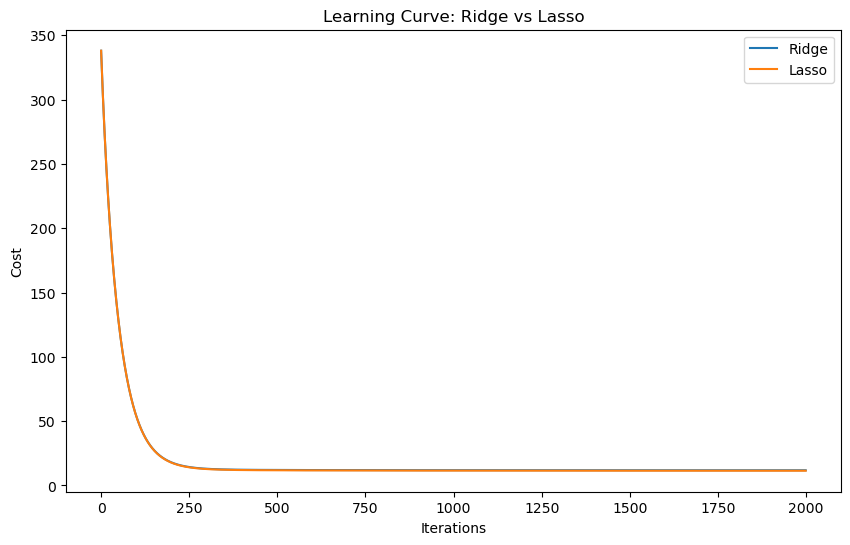

In [22]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(len(ridge_cost)), y=ridge_cost, label="Ridge")
sns.lineplot(x=range(len(lasso_cost)), y=lasso_cost, label="Lasso")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Learning Curve: Ridge vs Lasso")
plt.show()